**General de probabilida problema 4.** Calcular la probabilidad que n personas (n ≤ 365) tengan fechas diferentes de cumpleaños, i.e, escribir la formula general de cálculo. Grafique la probabilidad P(n ≤ 80) como función de n. Los números son demasiado grandes, pero Python puede manejar dichas cantidades.

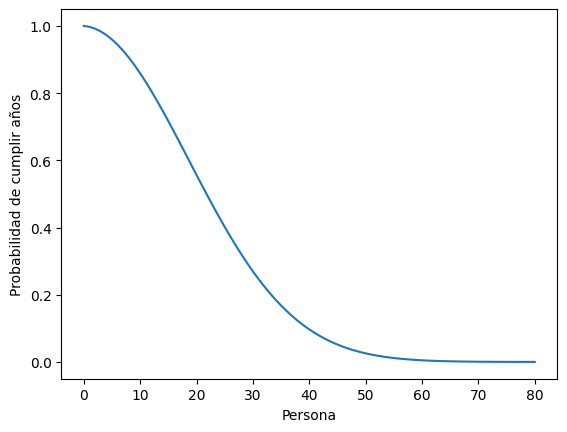

In [9]:
import numpy as np
import matplotlib.pyplot as plt

experimentos = 81
casos_posibles = 365
lista_vacia = np.zeros(81)
prior = 1
prob_personas = np.array(list(range(81)))

for i in range(len(lista_vacia)):
    prior *= (casos_posibles - i) / casos_posibles
    lista_vacia[i] = prior

plt.plot(prob_personas, lista_vacia)
plt.xlabel("Persona")
plt.ylabel("Probabilidad de cumplir años")
plt.show()

**Optimización problema 3**

El volumen de una caja está descrito por las tres coordenadas del sistema cartesiano:



V(x, y, z) = xyz



Hay suficiente material para fabricar cajas cuya área superficial (sin la tapa superior) sea 12 cm2.

(a) Haga un dibujo para visualizar la caja sujeta a que la profundidad de la caja sea etiquetada por z.

(b) Muestre que el área superficial es:
   A(x, y, z) = xy + 2yz + 2xz = 12 (6.28)

(c) Use el paquete Scipy.optimize para maximizar el volumen de la caja sujeto a la restricción de que el área lateral sea 12 cm2.

(d) ¿Cuál es el volumen máximo que podría almacenar el usuario en este producto?

(e) Use el método de multiplicadores de Lagrange para encontrar la solución de este problema.


**(c) y (d):**

In [6]:
import numpy as np
from scipy.optimize import minimize

def calcVolume(x):
  length = x[0]
  width = x[1]
  height = x[2]
  volume = length * width * height
  return volume

def calcSurface(x):
  length = x[0]
  width = x[1]
  height = x[2]
  surfaceArea = length*width + 2*length*height + 2*height*width
  return surfaceArea

def objective(x):
  return -calcVolume(x)

def constraint(x):
  return 12 - calcSurface(x)

cons = ({'type': 'ineq', 'fun':constraint})

lengthGuess = 1
widthGuess = 1
heightGuess = 1

x0 = np.array([lengthGuess,widthGuess,heightGuess])

sol = minimize(objective,x0,method='SLSQP',constraints=cons,options={'disp':True})

xOpt = sol.x
volumeOpt = -sol.fun

surfaceAreaOpt = calcSurface(xOpt)

print('Length: ' + str(xOpt[0]))
print('Width: ' + str(xOpt[1]))
print('Height: ' + str(xOpt[2]))
print('Volume: ' + str(volumeOpt))
print('Surface Area: ' + str(surfaceAreaOpt))



Optimization terminated successfully    (Exit mode 0)
            Current function value: -3.999999735431508
            Iterations: 7
            Function evaluations: 28
            Gradient evaluations: 7
Length: 1.9999931802360864
Width: 1.9999931299329017
Height: 1.0000067788080702
Volume: 3.999999735431508
Surface Area: 11.999999471001765


**(e):**

In [ ]:
import numpy as np
from scipy.optimize import minimize

def calcVolume(x):
    length, width, height = x
    volume = length * width * height
    return volume

def calcSurface(x):
    length, width, height = x
    surfaceArea = length * width + 2 * length * height + 2 * height * width
    return surfaceArea

def lagrange_multiplier(x):
    return -calcVolume(x)

def lagrange_constraint(x):
    return 12 - calcSurface(x)

lengthGuess = 1
widthGuess = 1
heightGuess = 1

x0 = np.array([lengthGuess, widthGuess, heightGuess])

# Solución usando el método SLSQP con multiplicadores de Lagrange
sol = minimize(lagrange_multiplier, x0, method='SLSQP', constraints={'type': 'eq', 'fun': lagrange_constraint}, options={'disp': True})

xOpt = sol.x
volumeOpt = calcVolume(xOpt)
surfaceAreaOpt = calcSurface(xOpt)

print('Length: ' + str(xOpt[0]))
print('Width: ' + str(xOpt[1]))
print('Height: ' + str(xOpt[2]))
print('Volume: ' + str(volumeOpt))
print('Surface Area: ' + str(surfaceAreaOpt))


**Mínimos cuadrados problema 1.** Se tienen tres líneas en ℝ²:

   2x - y = 2

   x + 2y = 1

   x + y = 4

**(b)** Realice una búsqueda iterativa entre -5 ≤ x ≤ 5 y -5 ≤ y ≤ 5 con un paso de h = 0.01 para encontrar la menor distancia del problema. Grafique la distancia y compare con el resultado obtenido con mínimos cuadrados.



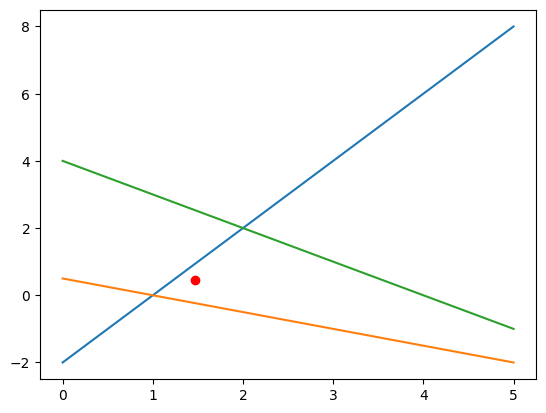

Punto de mínimo: [1.46464646 0.45454545]


In [16]:
import numpy as np
import matplotlib.pyplot as plt

lineas = np.array([[2, -1], [1, 2], [1, 1]])
y = np.array([2, 1, 4])
tm = np.linspace(0, 5, 100)

Arr = np.linspace(-5, 5, 100)
vector_nuevo = np.zeros(2)

linea1 = lambda x: 2 * x - 2
linea2 = lambda x: -0.5 * x + 0.5
linea3 = lambda x: 4 - x

resultado = np.zeros((1, 2))

normas = float('inf')
rta_dot = np.zeros(2)

for i in range(len(Arr)):
    for j in range(len(Arr)):
        vector_nuevo[0], vector_nuevo[1] = Arr[i], Arr[j]
        z1 = np.dot(lineas, vector_nuevo) - y
        actual = np.linalg.norm(z1)

        if actual < normas:
            normas = actual
            rta_dot[0], rta_dot[1] = Arr[i], Arr[j]
            resultado = np.append(resultado, [[rta_dot[0], rta_dot[1]]], axis=0)

resultado = resultado[1:]

plt.plot(tm, linea1(tm))
plt.plot(tm, linea2(tm))
plt.plot(tm, linea3(tm))
plt.scatter(rta_dot[0], rta_dot[1], color="r")
plt.show()

print("Punto de mínimo:", rta_dot)


In [19]:
x = Arr
y = Arr
X,Y=np.meshgrid(x,y)
Z=np.zeros((len(X),len(Y)))

In [23]:
A = np.array([[2,-1],[1,2],[1,1]])
b = np.array([2,1,4])

for i in range(len(X)):
  for j in range(len(Y)):

    v_min = np.linalg.norm(np.dot(A,(np.array([x[i], y[j]])))-b)
    Z[i,j]=v_min

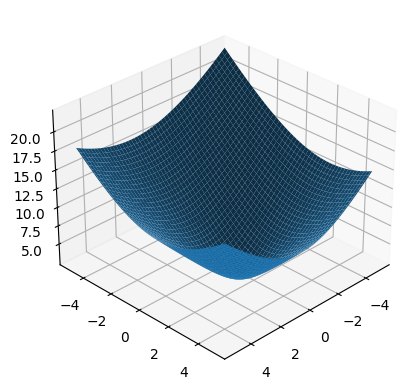

In [25]:
ax = plt.axes(projection ='3d')
# Creating plot
ax.plot_surface(X, Y, Z)
ax.view_init(30,45)

**(Minimos cuadrados problema 7.)** Calcule la proyección ortogonal del vector ~b = (−3, −3, 8, 9) sobre el sub-espacio W
   generado por los vectores:
   ~u1 = (3, 1, 0, 1)
   ~u2 = (1, 2, 1, 1)
   ~u3 = (−1, 0, 2, −1) (9.31)

   a) Usando mínimos cuadrados matriciales. La proyección ortogonal es pW (b) = Ax, donde
      las columnas de A son los vectores base y x es la solución de mínimos cuadrados.


   b) Con el proceso de Grand-Schmidt obtener una base ortonormal (v1, v2, v3) y luego
      calcular la proyección sobre dicha base: pW (b) = c1v1 + c2v2 + c3v3, donde ci = < b.vi >
      para i = 1, 2, 3. Respuesta: pW (b) = (−2, 3, 4, 0)

   Recuerde que el procedimiento de Gram-Schmidt es:
   uk = vk − Σj=1(k-1) < vk, uj > / < uj, uj > * uj


In [67]:
import numpy as np

# Vectores dados con tipo de dato float
b = np.array([-3.0, -3.0, 8.0, 9.0])
u1 = np.array([3.0, 1.0, 0.0, 1.0])
u2 = np.array([1.0, 2.0, 1.0, 1.0])
u3 = np.array([-1.0, 0.0, 2.0, -1.0])
b=np.array([[-3.0], [-3.0], [8.0],[9.0]])

Matriz=np.array([3,1,0,1],[1,2,1,1], [-1,0,2,-1])
Transpuesta=Matriz.T
np.dot(Transpuesta,Matriz)

np.dot(Transpuesta,b)

B = np.dot(Transpuesta_1,Matriz_1)
C=np.dot(Transpuesta_1,b)



print(B,C)

np.linalg.solve(B,C)


TypeError: ignored

**(b)**

In [59]:
Gu1 = u1
Gu2 = u2 - (np.dot(u2,Gu1)/np.dot(Gu1,Gu1)) * (Gu1)
Gu3 = u3 - (np.dot(u3,Gu1)/np.dot(Gu1,Gu1)) * (Gu1) - (np.dot(u3,Gu2)/np.dot(Gu2,Gu2)) * (Gu2)


proy =  np.dot(b,Gu1) + Gu1 + np.dot(b,Gu2) * Gu2 + np.dot(b,Gu3) * Gu3

proy

array([-13.61765675,   9.42223981,  14.25980207,  -1.56926957])

In [43]:
print(Transpuesta)

[[ 3.  1. -1.]
 [ 1.  2.  0.]
 [ 0.  1.  2.]
 [ 1.  1. -1.]]
